In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('winemag-data_first150k.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [8]:
#Clean up dataset by dropping duplicates and nulls
clean = df[df.duplicated('description', keep=False)]
clean.dropna(subset=['description', 'points'])
clean.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
25,25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
29,29,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah
60,60,Argentina,"Concentrated, ripe blackberry and cassis aroma...",The Apple Doesn't Fall Far From The Tree,91,30.0,Mendoza Province,Mendoza,NaN,Malbec,Matias Riccitelli
61,61,Australia,Moorooduc's estate Pinot Noir is a solid value...,NaN,91,36.0,Victoria,Mornington Peninsula,NaN,Pinot Noir,Moorooduc
62,62,Argentina,Smoky aromas of fresh-cut wood blend with berr...,Alegoría Gran Reserva,91,25.0,Mendoza Province,Mendoza,NaN,Malbec,Navarro Correas


In [9]:
simple = clean[['description', 'points']]
simple.head()

,description,points
25,"Yields were down in 2015, but intensity is up,...",94
29,This standout Rocks District wine brings earth...,94
60,"Concentrated, ripe blackberry and cassis aroma...",91
61,Moorooduc's estate Pinot Noir is a solid value...,91
62,Smoky aromas of fresh-cut wood blend with berr...,91


In [10]:
#Transform method taking points as param
def transform_points_simplified(points):
    if points < 82:
        return 1
    elif points >= 82 and points < 87:
        return 2 
    elif points >= 87 and points < 92:
        return 3 
    elif points >= 92 and points < 97:
        return 4 
    else:
        return 5

simple = simple.assign(bucket = simple['points'].apply(transform_points_simplified))
simple.head()

,description,points,bucket
25,"Yields were down in 2015, but intensity is up,...",94,4
29,This standout Rocks District wine brings earth...,94,4
60,"Concentrated, ripe blackberry and cassis aroma...",91,3
61,Moorooduc's estate Pinot Noir is a solid value...,91,3
62,Smoky aromas of fresh-cut wood blend with berr...,91,3


Text(0.5, 0, 'Grade')

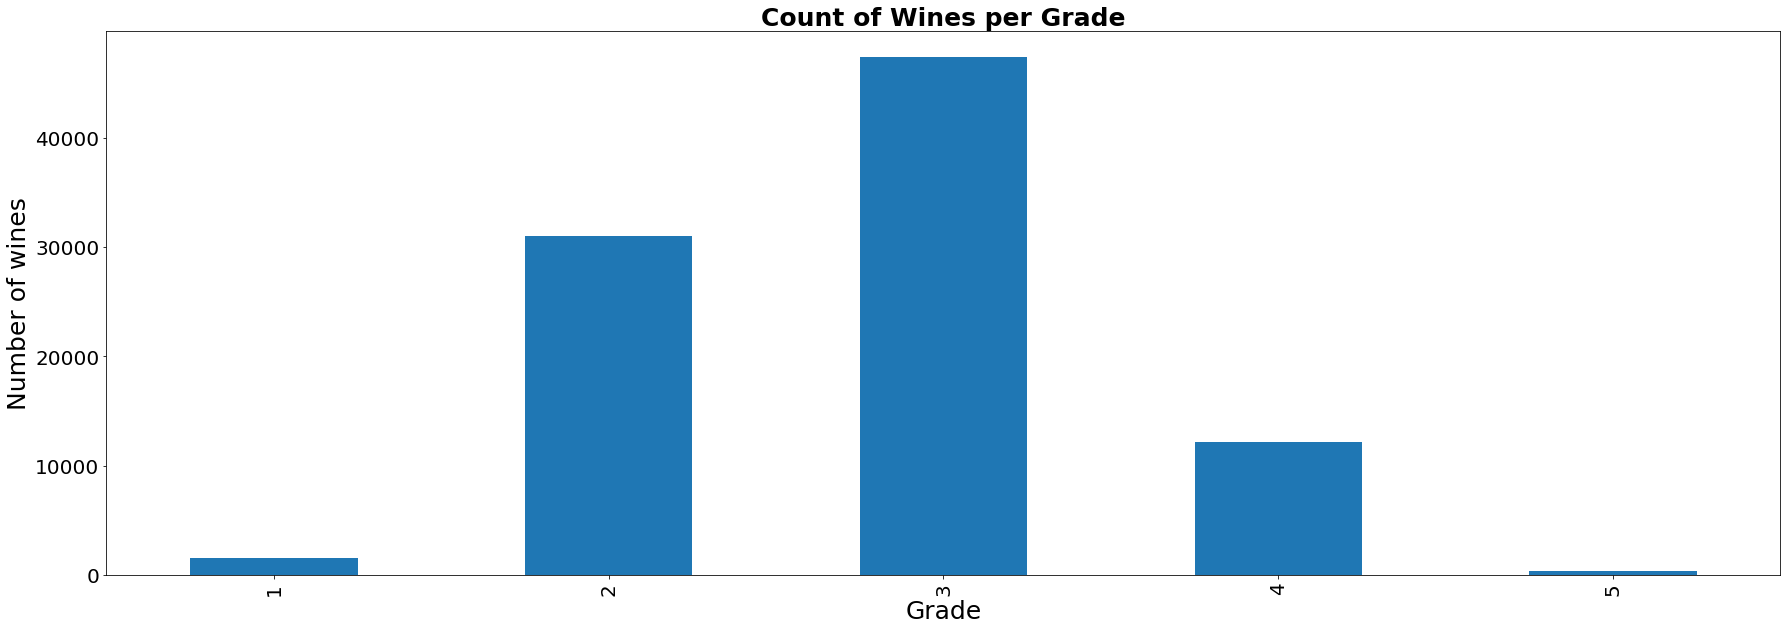

In [14]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Count of Wines per Grade', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
#ax.set_xlabel('Grade', fontsize = 25) # X label
simple.groupby(['bucket']).count()['description'].plot(ax=ax, kind='bar')
ax.set_xlabel('Grade', fontsize = 25) # X label

In [16]:
df_length = simple.assign(description_length = simple['description'].apply(len))
df_length.info()
df_length.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92393 entries, 25 to 150929
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   description         92393 non-null  object
 1   points              92393 non-null  int64 
 2   bucket              92393 non-null  int64 
 3   description_length  92393 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.5+ MB


,description,points,bucket,description_length
25,"Yields were down in 2015, but intensity is up,...",94,4,215
29,This standout Rocks District wine brings earth...,94,4,333
60,"Concentrated, ripe blackberry and cassis aroma...",91,3,242
61,Moorooduc's estate Pinot Noir is a solid value...,91,3,315
62,Smoky aromas of fresh-cut wood blend with berr...,91,3,229


KeyboardInterrupt: 

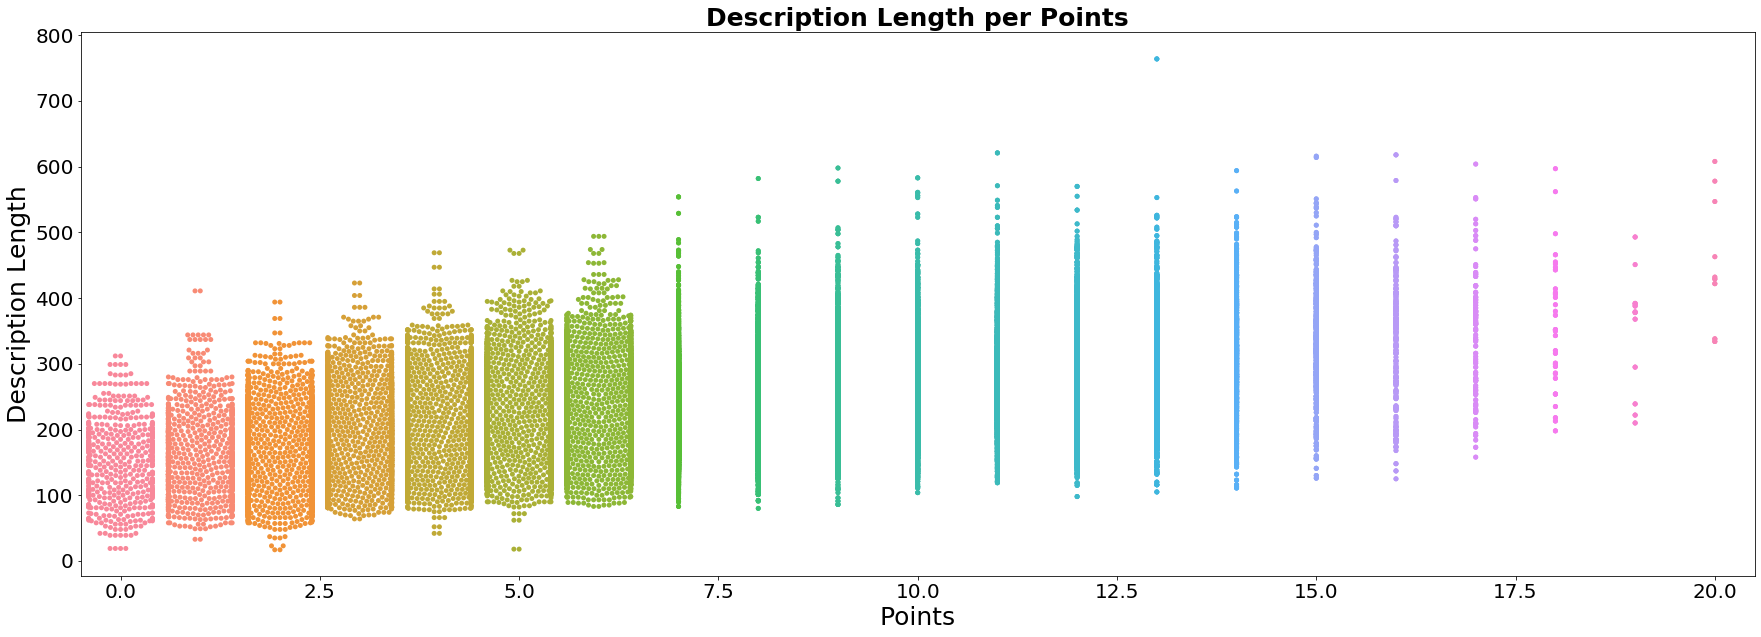

In [28]:
#Scatter plot of points vs description length
import seaborn as sns
fig, ax = plt.subplots(figsize=(30,10))
x = df_length['points']
y = df_length['description_length']
colors = df_length['bucket']

plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label

sns.boxplot(x='points', y='description_length', data=df_length)
plt.show()